In [1]:
# importing Dependancies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import statsmodels.formula.api as smf

In [2]:
df=pd.read_csv("Thyroid_Diff.csv")
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [4]:
df.isna().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

## Cheking unique values in data sets

In [5]:
df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [6]:
df["Hx Smoking"].unique()

array(['No', 'Yes'], dtype=object)

In [7]:
df["Smoking"].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
df["Hx Radiothreapy"].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
df["Thyroid Function"].unique()

array(['Euthyroid', 'Clinical Hyperthyroidism', 'Clinical Hypothyroidism',
       'Subclinical Hyperthyroidism', 'Subclinical Hypothyroidism'],
      dtype=object)

In [10]:
df["Physical Examination"].unique()

array(['Single nodular goiter-left', 'Multinodular goiter',
       'Single nodular goiter-right', 'Normal', 'Diffuse goiter'],
      dtype=object)

In [11]:
df["Adenopathy"].unique()

array(['No', 'Right', 'Extensive', 'Left', 'Bilateral', 'Posterior'],
      dtype=object)

In [12]:
df["Pathology"].unique()

array(['Micropapillary', 'Papillary', 'Follicular', 'Hurthel cell'],
      dtype=object)

In [13]:
df["Focality"].unique()

array(['Uni-Focal', 'Multi-Focal'], dtype=object)

In [14]:
df["Risk"].unique()

array(['Low', 'Intermediate', 'High'], dtype=object)

In [15]:
df["T"].unique()

array(['T1a', 'T1b', 'T2', 'T3a', 'T3b', 'T4a', 'T4b'], dtype=object)

In [16]:
df["N"].unique()

array(['N0', 'N1b', 'N1a'], dtype=object)

In [17]:
df["M"].unique()

array(['M0', 'M1'], dtype=object)

In [18]:
df["Stage"].unique()

array(['I', 'II', 'IVB', 'III', 'IVA'], dtype=object)

In [19]:
df["Response"].unique()

array(['Indeterminate', 'Excellent', 'Structural Incomplete',
       'Biochemical Incomplete'], dtype=object)

In [20]:
df["Recurred"].unique()

array(['No', 'Yes'], dtype=object)

## Graphical Visualization 

<Axes: >

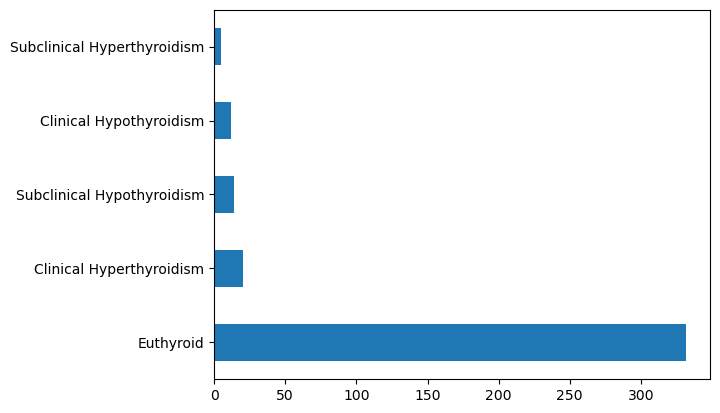

In [21]:
df["Thyroid Function"].value_counts().plot(kind="barh", stacked=True)

<Axes: >

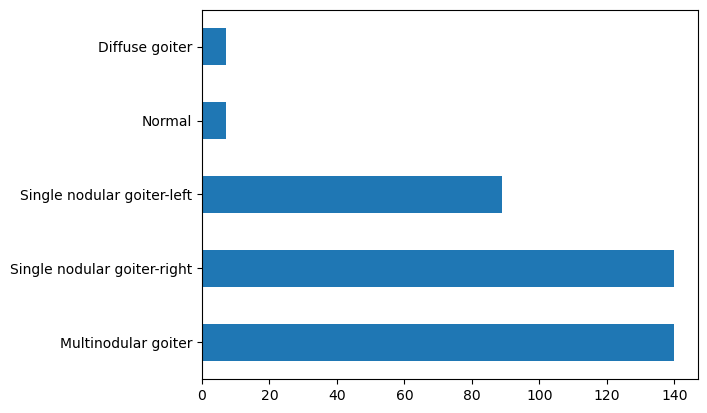

In [22]:
df["Physical Examination"].value_counts().plot(kind="barh", stacked=True)

<Axes: >

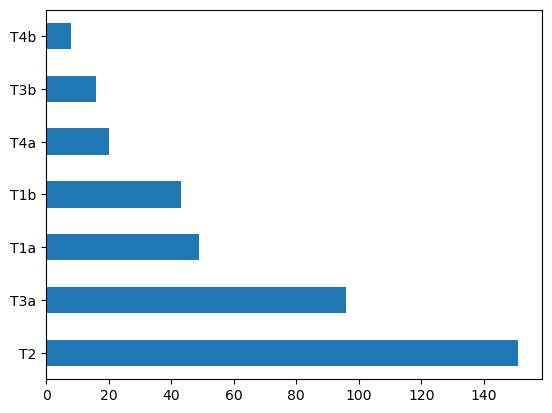

In [23]:
df["T"].value_counts().plot(kind="barh", stacked=True)

<Axes: >

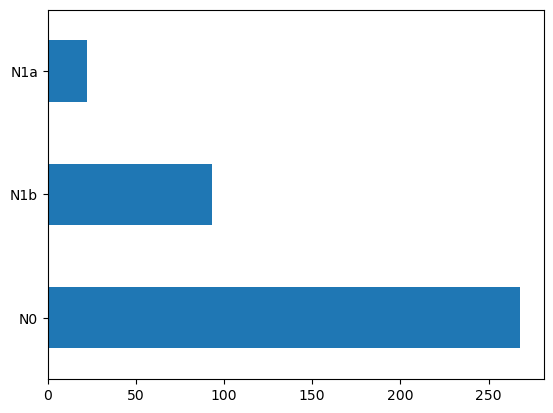

In [24]:
df["N"].value_counts().plot(kind="barh", stacked=True)

<Axes: >

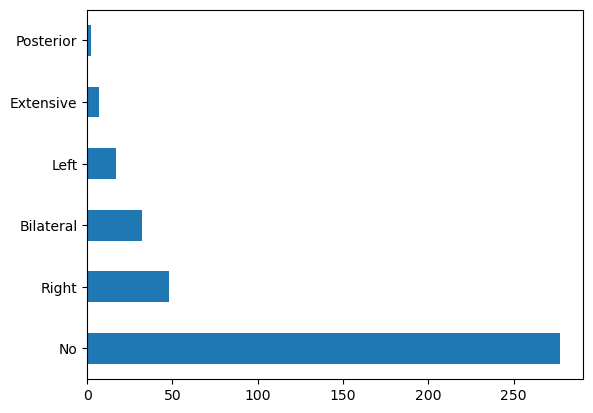

In [25]:
df["Adenopathy"].value_counts().plot(kind="barh", stacked=True)

<Axes: >

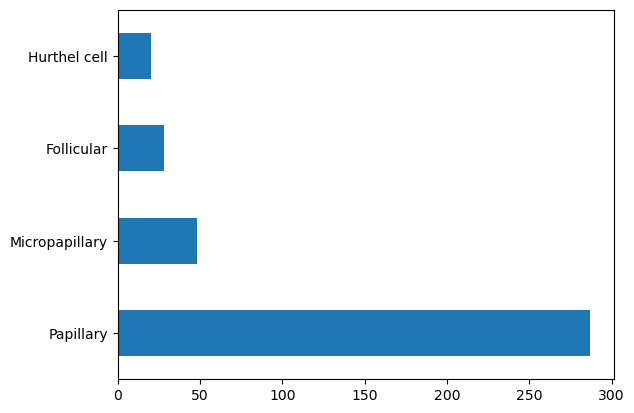

In [26]:
df["Pathology"].value_counts().plot(kind="barh", stacked=True)

<Axes: >

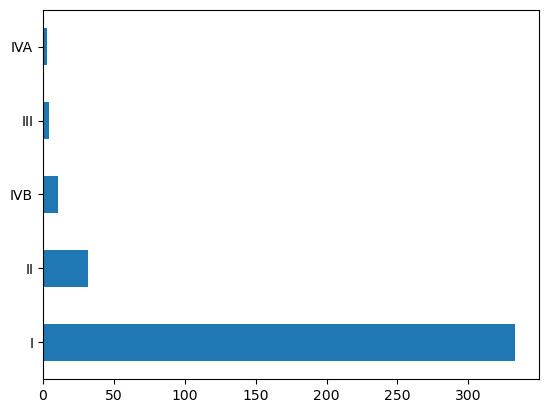

In [27]:
df["Stage"].value_counts().plot(kind="barh", stacked=True)

<Axes: >

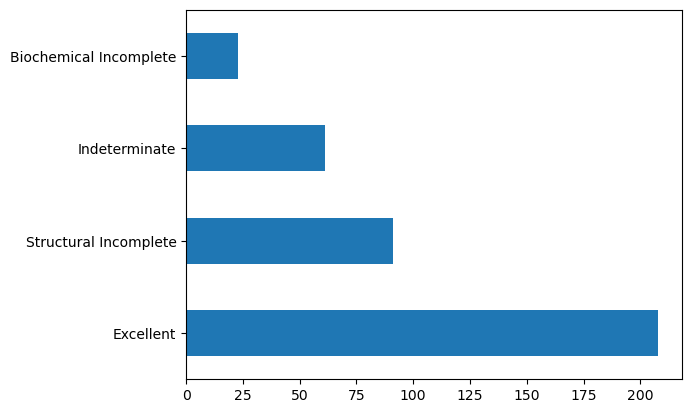

In [28]:
df["Response"].value_counts().plot(kind="barh", stacked=True)

<Axes: xlabel='Thyroid Function', ylabel='Age'>

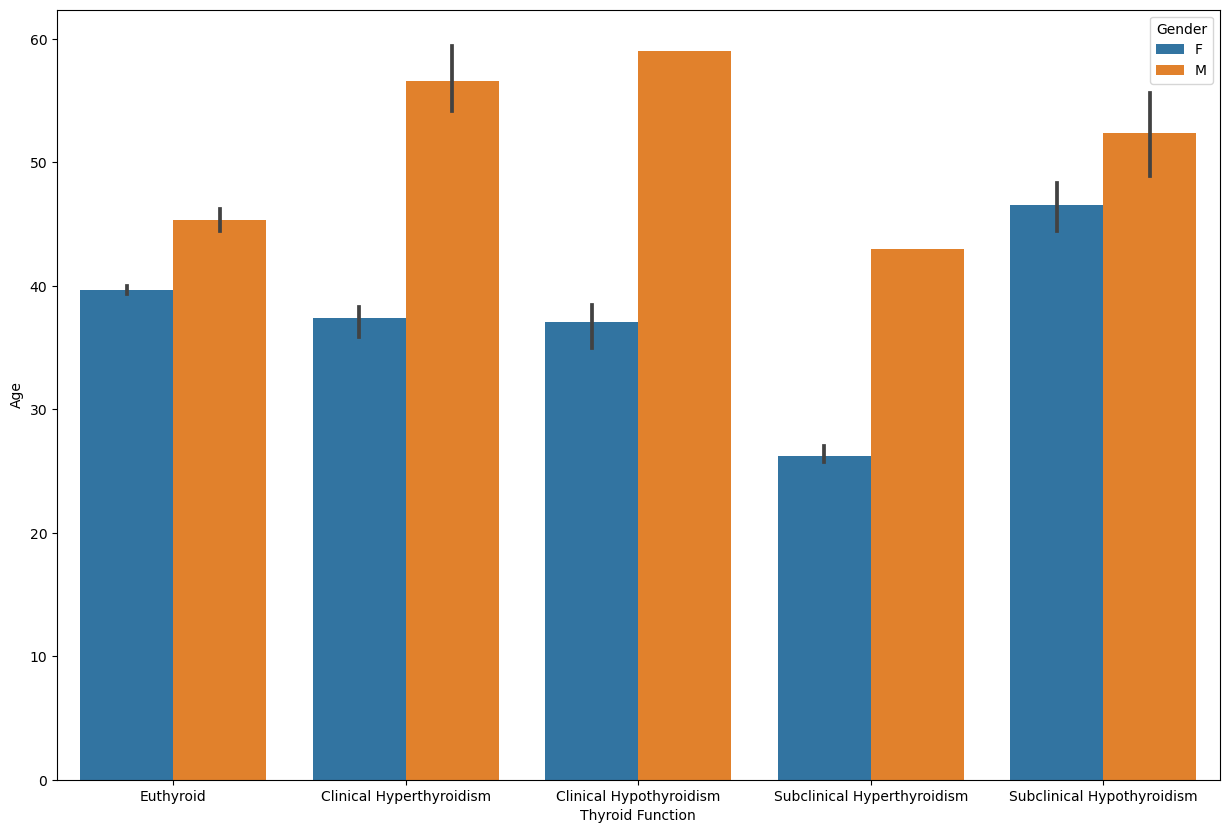

In [29]:
fig, ax=plt.subplots(figsize=(15,10))
sns.barplot(x="Thyroid Function",y="Age", data=df, hue="Gender", ax=ax,  errorbar=("ci",30))

<Axes: xlabel='Stage', ylabel='Age'>

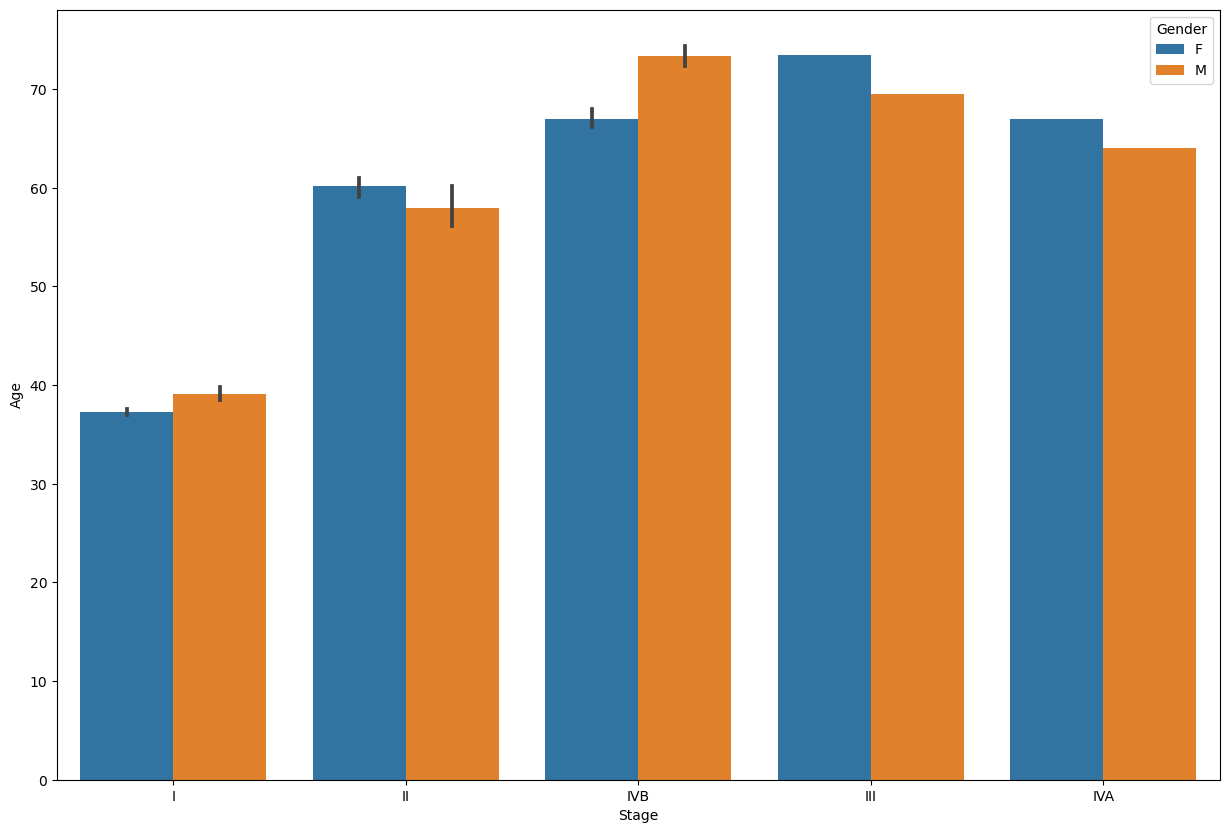

In [30]:
fig, ax=plt.subplots(figsize=(15,10))
sns.barplot(x="Stage",y="Age", data=df, hue="Gender", ax=ax,  errorbar=("ci",30))

<Axes: xlabel='Pathology', ylabel='Age'>

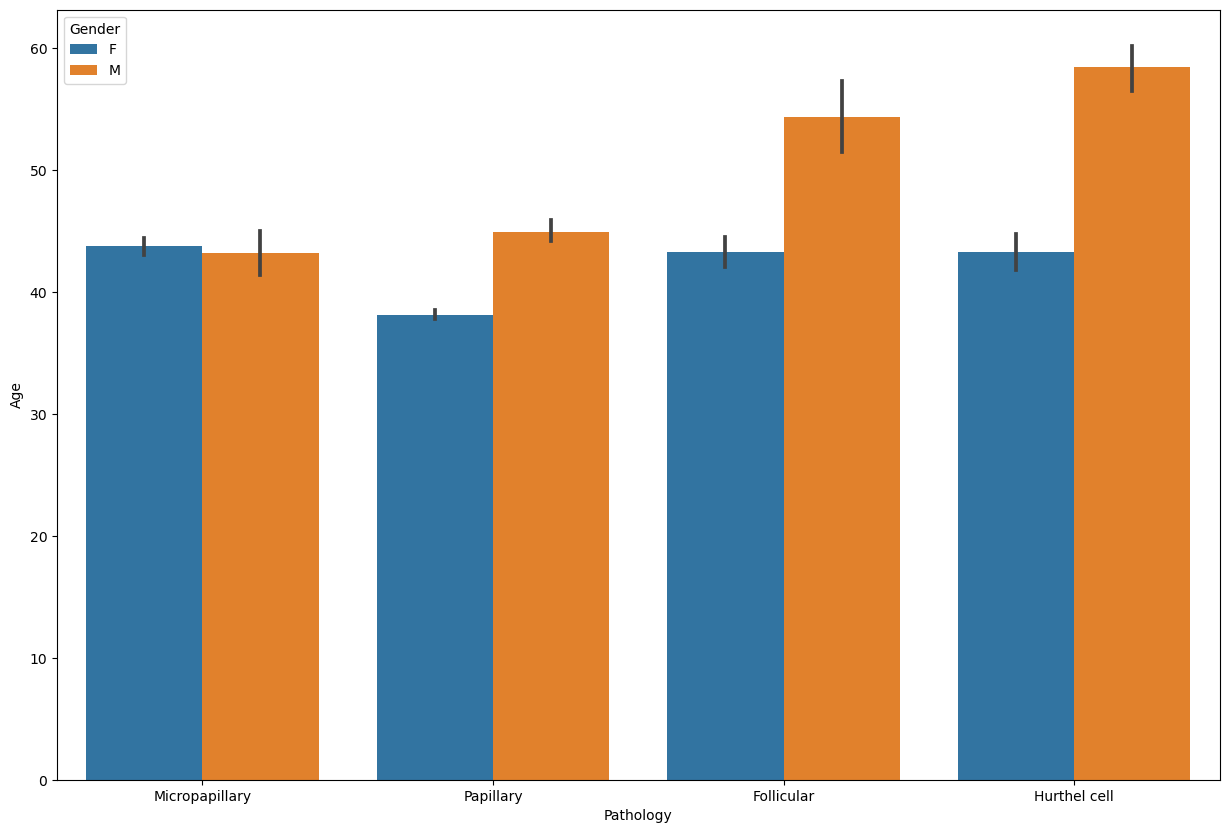

In [31]:
fig, ax=plt.subplots(figsize=(15,10))
sns.barplot(x="Pathology",y="Age", data=df, hue="Gender", ax=ax,  errorbar=("ci",30))

<Axes: xlabel='T', ylabel='Age'>

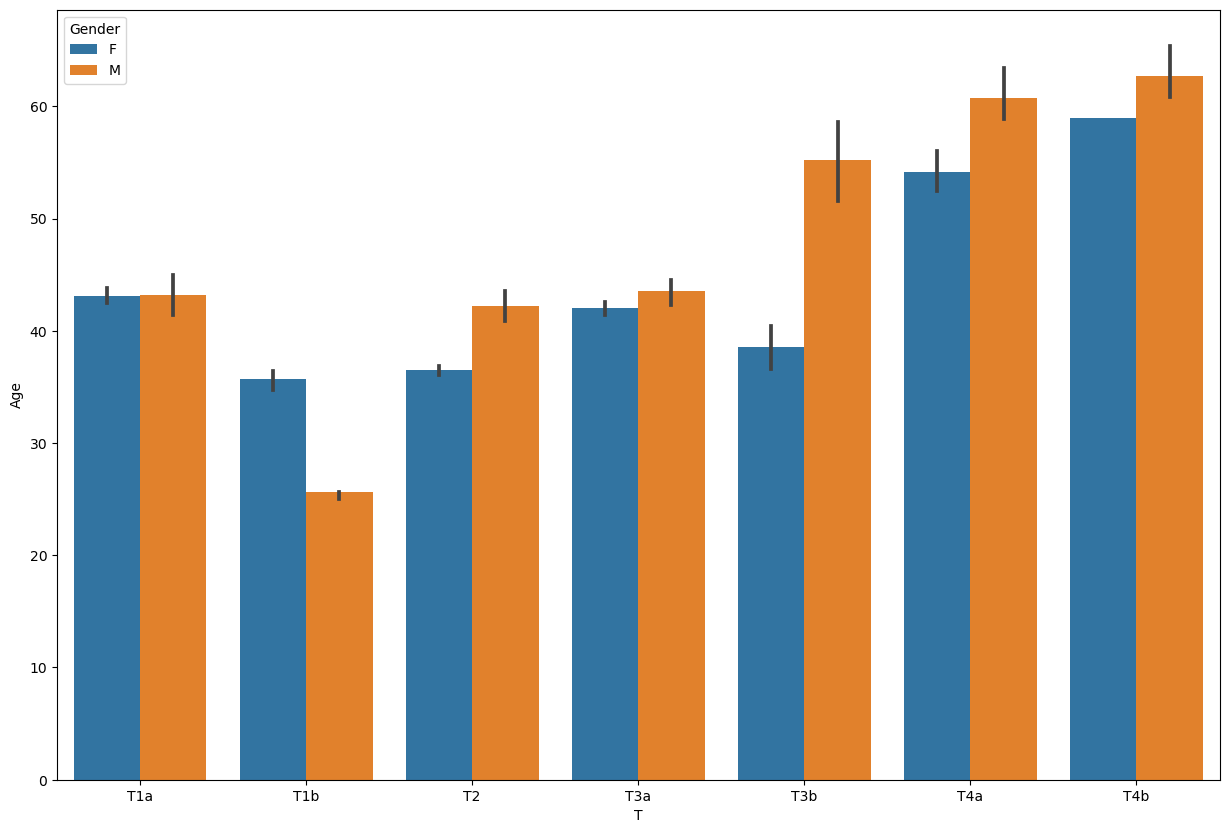

In [32]:
fig, ax=plt.subplots(figsize=(15,10))
sns.barplot(x="T",y="Age", data=df, hue="Gender", ax=ax,  errorbar=("ci",30))

## Model Training 

In [33]:
# applying Label Encoding
categorical_cols=["Gender","Smoking", "Hx Smoking","Hx Radiothreapy", "Focality",
                "Risk", "M","Recurred" ]
LE=LabelEncoder()
df[categorical_cols]=df[categorical_cols].apply(lambda col:LE.fit_transform(col))

In [34]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,Euthyroid,Single nodular goiter-left,No,Micropapillary,1,2,T1a,N0,0,I,Indeterminate,0
1,34,0,0,1,0,Euthyroid,Multinodular goiter,No,Micropapillary,1,2,T1a,N0,0,I,Excellent,0
2,30,0,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,1,2,T1a,N0,0,I,Excellent,0
3,62,0,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,1,2,T1a,N0,0,I,Excellent,0
4,62,0,0,0,0,Euthyroid,Multinodular goiter,No,Micropapillary,0,2,T1a,N0,0,I,Excellent,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,Euthyroid,Single nodular goiter-right,Right,Papillary,1,0,T4b,N1b,1,IVB,Biochemical Incomplete,1
379,81,1,1,0,1,Euthyroid,Multinodular goiter,Extensive,Papillary,0,0,T4b,N1b,1,IVB,Structural Incomplete,1
380,72,1,1,1,0,Euthyroid,Multinodular goiter,Bilateral,Papillary,0,0,T4b,N1b,1,IVB,Structural Incomplete,1
381,61,1,1,1,1,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,0,0,T4b,N1b,0,IVA,Structural Incomplete,1


In [35]:
# selecting target and feature variables
x=df.drop("Recurred", axis=1)
y=df["Recurred"]

In [36]:
x_encoded=pd.get_dummies(x, columns=["Thyroid Function","Physical Examination","Adenopathy","Pathology","T","N","Response", "Stage"])
x_encoded

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Focality,Risk,M,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,...,N_N1b,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB
0,27,0,0,0,0,1,2,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,34,0,0,1,0,1,2,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,30,0,0,0,0,1,2,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,62,0,0,0,0,1,2,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,62,0,0,0,0,0,2,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,1,0,1,0,0,...,1,1,0,0,0,0,0,0,0,1
379,81,1,1,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
380,72,1,1,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
381,61,1,1,1,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0


In [37]:
# spliting Data
x_train, x_test, y_train, y_test=train_test_split(x_encoded, y, stratify=y, random_state=42, test_size=0.3) 

In [38]:
# Importing LOgistic Regression
LR=LogisticRegression(max_iter=500)
LR.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [39]:
y_pred_test=LR.predict(x_test)
y_pred_train=LR.predict(x_train)

In [40]:
# Classifcation Report and Confussion Matrix
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[83  0]
 [ 2 30]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        83
           1       1.00      0.94      0.97        32

    accuracy                           0.98       115
   macro avg       0.99      0.97      0.98       115
weighted avg       0.98      0.98      0.98       115



In [41]:
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

[[191   1]
 [  5  71]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       192
           1       0.99      0.93      0.96        76

    accuracy                           0.98       268
   macro avg       0.98      0.96      0.97       268
weighted avg       0.98      0.98      0.98       268



In [42]:
# checking which parameter is most significant
a=LR.coef_[0]

In [47]:
pd.DataFrame(a, index=x_encoded.columns)

,0
Age,0.023890
Gender,0.490160
Smoking,0.195140
Hx Smoking,-0.103139
Hx Radiothreapy,0.021889
Focality,0.438802
Risk,-1.144221
M,0.088582
Thyroid Function_Clinical Hyperthyroidism,-0.798493
Thyroid Function_Clinical Hypothyroidism,0.607082


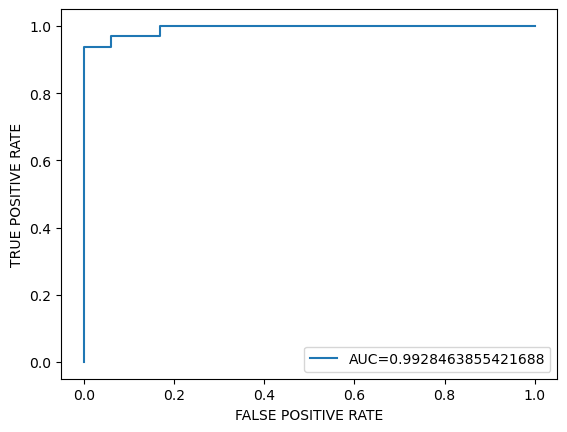

In [44]:
# Ploting ROC Curve
# probalistic values
y_pred_proba=LR.predict_proba(x_test)[:,1]

#defining RUC Curve
fpr, tpr,threshu=roc_curve(y_test, y_pred_proba)

# area under the curve
auc=roc_auc_score(y_test, y_pred_proba)

# Creating ROC Curve

plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.ylabel("TRUE POSITIVE RATE")
plt.xlabel("FALSE POSITIVE RATE")
plt.legend(loc=4)
plt.show()